### 1 - Install the necessary packages

In [ ]:
!pip -q install ./python

### 2 - Importing the necessary packages


We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### 3 - Starting the Unity environment

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded, if you need.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")

In [2]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


  ### 4 - Getting some information of the state and action spaces

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size # 4

env_info = env.reset(train_mode=True)[brain_name]
# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state) # 37
print('States look like:', state)

States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]


###  5 - Importing and initializing the agent

In [5]:
from dqn_agent import MyAgent
myAgent = MyAgent(state_size=state_size, action_size=action_size, seed=0)

### 6 - The DQN trainning function

In [9]:
#def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    solved = False
    episode_solved = None
    for i_episode in range(1, n_episodes+1):
        #print("episode: " + str(i_episode))
        #print("brain_name: " + brain_name)
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        #print("env_info.visual_observations: " + str(env_info.vector_observations))
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = int(myAgent.act(state, eps))
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]  
            myAgent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            #print("Eps: " + str(eps))
        if (np.mean(scores_window) >= 13.0) and solved is not True:
            solved = True
            episode_solved = i_episode-100
            #print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(myAgent.qnetwork_local.state_dict(), 'checkpoint.pth')
            #break
    if solved:
        print('\nEnvironment solved in {:d} episodes!'.format(episode_solved))
    return scores

### 7 - Trainning and solving

Episode 100	Average Score: 1.91
Episode 200	Average Score: 5.86
Episode 300	Average Score: 8.95
Episode 400	Average Score: 11.20
Episode 500	Average Score: 12.30
Episode 600	Average Score: 14.09
Episode 700	Average Score: 15.44
Episode 800	Average Score: 16.08
Episode 900	Average Score: 15.60
Episode 1000	Average Score: 16.08

Environment solved in 424 episodes!


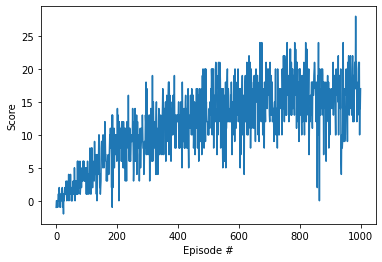

In [10]:
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

torch.save(myAgent.qnetwork_local.state_dict(), 'checkpoint.pth')

### 8 - Running the trained agent 

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]
myAgent = MyAgent(state_size=state_size, action_size=action_size, seed=0)
myAgent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

score = 0                                          # initialize the score

while True:
    #action = np.random.randint(action_size)        # select an action
    action = int(myAgent.act(state))
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

### 9 - Closing the environment

In [ ]:
env.close()